In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
glass=pd.read_csv('D:\dinesh document\EXCELR\Data Science\Assingment\KNN\glass.csv')

## EDA

In [3]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
value_counts = glass['Type'].value_counts()
value_counts

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [6]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
glass.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

<AxesSubplot:>

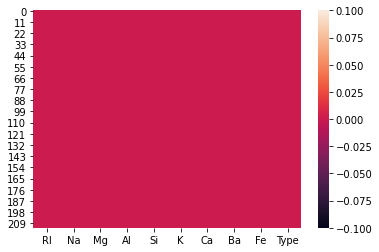

In [9]:
sns.heatmap(glass.isna())

### visualisation

<AxesSubplot:>

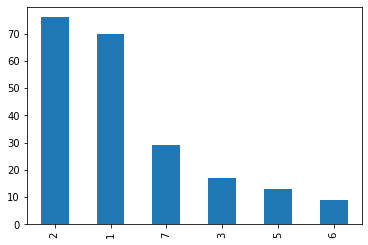

In [10]:
value_counts.plot(kind='bar')

##### Glass type 2 are high in count

<AxesSubplot:>

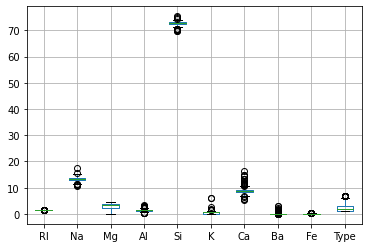

In [11]:
glass.boxplot()

array([[<AxesSubplot:title={'center':'Al'}>,
        <AxesSubplot:title={'center':'Ba'}>,
        <AxesSubplot:title={'center':'Ca'}>],
       [<AxesSubplot:title={'center':'Fe'}>,
        <AxesSubplot:title={'center':'K'}>,
        <AxesSubplot:title={'center':'Mg'}>],
       [<AxesSubplot:title={'center':'Na'}>,
        <AxesSubplot:title={'center':'RI'}>,
        <AxesSubplot:title={'center':'Si'}>],
       [<AxesSubplot:title={'center':'Type'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

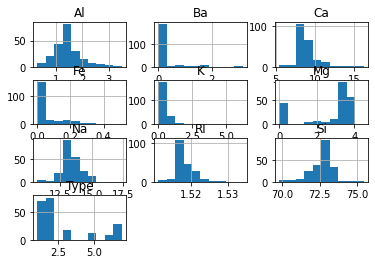

In [12]:
glass.hist()

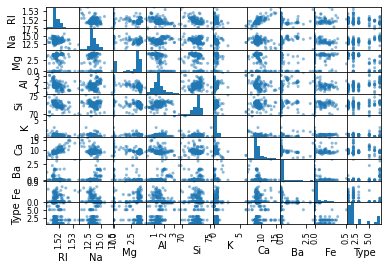

In [13]:
pd.plotting.scatter_matrix(glass)
plt.show()

### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc=StandardScaler()

In [16]:
x=glass.iloc[:,:-1]
y=glass.iloc[:,-1]

In [17]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [18]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [19]:
x=pd.DataFrame(sc.fit_transform(x))

In [20]:
x

,0,1,2,3,4,5,6,7,8
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.25,random_state=1)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
knn=KNeighborsClassifier()


In [53]:
def predict(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    trainac=model.score(xtrain,ytrain)
    testac=model.score(xtest,ytest)
    
    print(f"train AC {trainac}\ntest AC {testac}")

In [54]:
predict(KNeighborsClassifier())

train AC 0.7875
test AC 0.7222222222222222


In [55]:
knn

KNeighborsClassifier()

## Hyperparameter Tunning For KNN

In [38]:
trainac=[]
testac=[]

for i in range(1,35):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    
    trainac.append(knn.score(xtrain,ytrain))
    testac.append(knn.score(xtest,ytest))

In [39]:
trainac

[1.0,
 0.83125,
 0.83125,
 0.8,
 0.7875,
 0.7625,
 0.71875,
 0.71875,
 0.7125,
 0.68125,
 0.675,
 0.66875,
 0.68125,
 0.66875,
 0.65625,
 0.6375,
 0.65625,
 0.64375,
 0.6375,
 0.64375,
 0.6375,
 0.6375,
 0.64375,
 0.625,
 0.6125,
 0.6125,
 0.61875,
 0.6125,
 0.6125,
 0.6,
 0.59375,
 0.59375,
 0.59375,
 0.60625]

In [40]:
testac

[0.7222222222222222,
 0.7222222222222222,
 0.7037037037037037,
 0.7037037037037037,
 0.7222222222222222,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.7407407407407407,
 0.7407407407407407,
 0.7407407407407407,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.7037037037037037,
 0.6666666666666666,
 0.7037037037037037,
 0.7222222222222222,
 0.6851851851851852,
 0.7037037037037037,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.7037037037037037,
 0.7037037037037037,
 0.6666666666666666,
 0.6666666666666666]

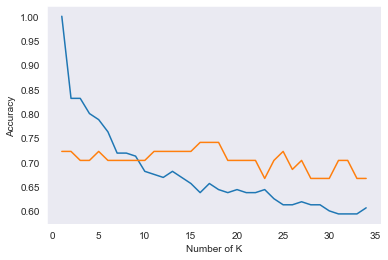

In [41]:
sns.set_style('darkgrid')

plt.plot(range(1,35),trainac)
plt.plot(range(1,35),testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [59]:
predict(KNeighborsClassifier(n_neighbors=5))

train AC 0.7875
test AC 0.7222222222222222


#### we can select optimum number of k based on above graph